# Basic Math Operations

<h3> In this session, we are going to work through the Basic Math Operations on Images like: <br></h3>
    <b>o Increasing Image Contrast<br>
    o Increasing Image Brightness<br>
    o Masking and adding mask<br>
    o Augmenting Image using mask<br><b>

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
elon = cv2.imread("musk.jpg")
plt.interactive(True)

Text(0.5, 1.0, 'Normalized float to [0, 1]')

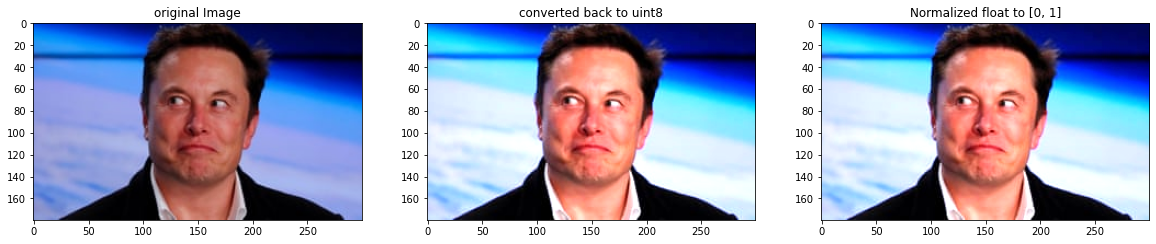

In [3]:
# Increase Image Contrast
contrastPercentage = 50
# Clip the values to [0,255] and change it back to uint8 for display
contrastImage = elon * (1+contrastPercentage/100)
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)

# Convert the range to [0,1] and keep it in float format
contrastHighNormalized = (elon * (1+contrastPercentage/100))/255
contrastHighNormalized01Clipped = np.clip(contrastHighNormalized,0,1)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(elon[...,::-1]);plt.title("original Image")
plt.subplot(132);plt.imshow(contrastHighClippedUint8[...,::-1]);plt.title("converted back to uint8")
plt.subplot(133);plt.imshow(contrastHighNormalized01Clipped[...,::-1]);plt.title("Normalized float to [0, 1]")

Text(0.5, 1.0, 'High Brightness')

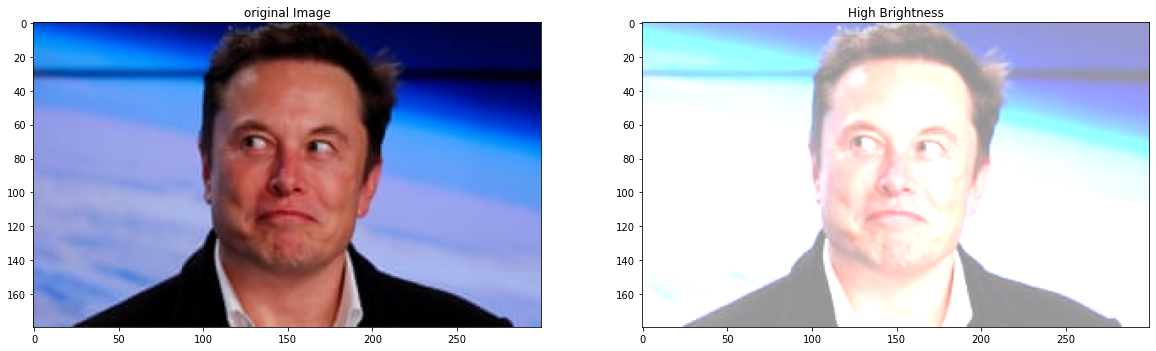

In [5]:
# Easiest method of increasing brightness

# Add the offset for increasing brightness
brightnessOffset = 150
# Explanation: Addition of elon image with white image results in a whiter elon image
brightHighOpenCV = cv2.add(elon, np.ones(elon.shape, dtype='uint8')*brightnessOffset)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(elon[...,::-1]);plt.title("original Image")
plt.subplot(122);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("High Brightness")

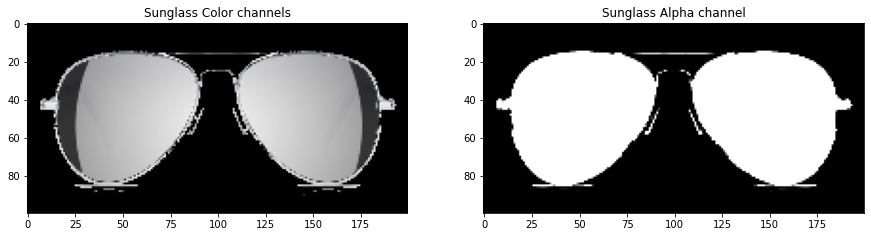

In [7]:
sunglasses = cv2.imread("sunglasses.png", -1)
sunglasses = cv2.resize(sunglasses, (200, 100))

earring = cv2.imread("earring.png", -1)
earring = cv2.resize(earring, (25, 25))

# Separate the Color and alpha channels
glassBGR = sunglasses[:,:,0:3]
glassMask1 = sunglasses[:,:,3]

earringBGR = earring[:,:,0:3]
earringMask1 = earring[:,:,3]


# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

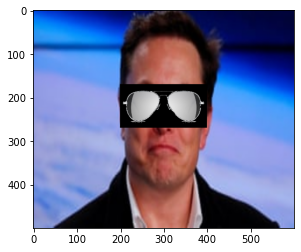

In [8]:
# Make a copy
elonBigger = elon.copy()
elonBigger = cv2.resize(elonBigger, (600, 500))
faceWithGlassesNaive = elonBigger.copy()

# Replace the eye region with the sunglass image
faceWithGlassesNaive[170:270,200:400]=glassBGR
plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

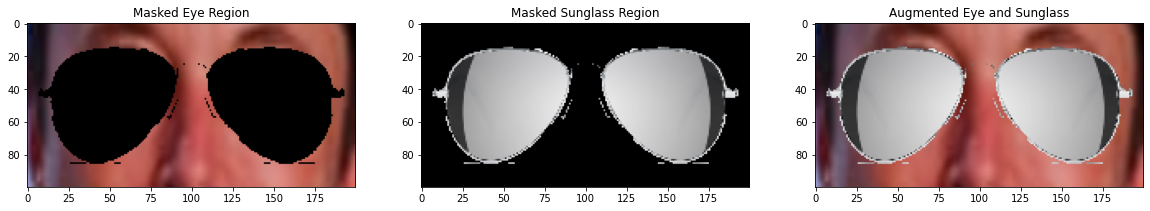

In [10]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))
earringMask = cv2.merge((earringMask1, earringMask1, earringMask1))

#https://stackoverflow.com/a/59669649/8795734

# Make the values [0,1] since we are using arithmetic operations
glassMask = np.uint8(glassMask/255)
earringMask = np.uint8(earringMask/255)

faceWithGlassesArithmetic = elonBigger.copy()
eyeROI = faceWithGlassesArithmetic[170:270,200:400]
earROI = faceWithGlassesArithmetic[300:325,380:405]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI, (1-glassMask))
maskedEar = cv2.multiply(earROI, (1-earringMask))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR,glassMask)
maskedEarring = cv2.multiply(earringBGR, earringMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)
earRoiFinal = cv2.add(maskedEar, maskedEarring)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

Text(0.5, 1.0, 'With Sunglasses and earring ;)')

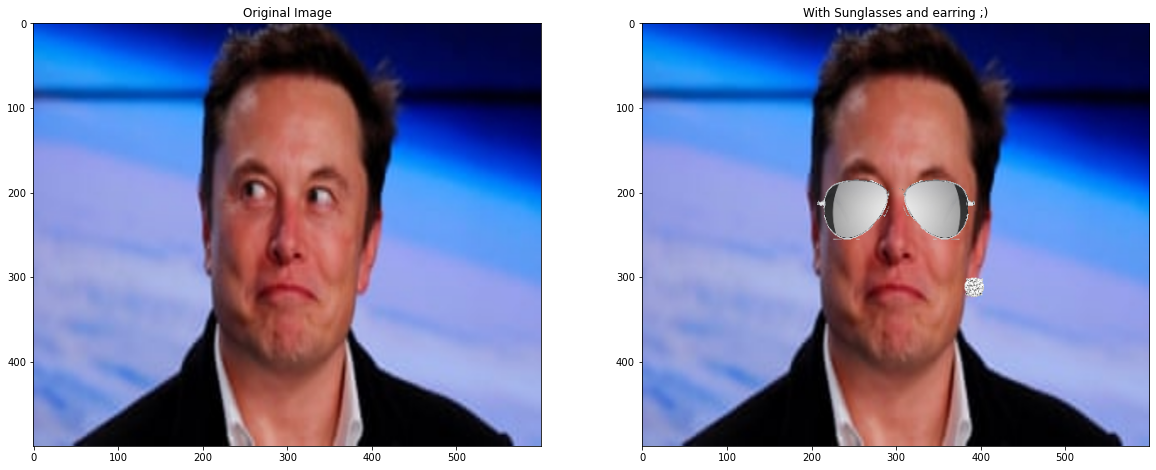

In [11]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[170:270,200:400] = eyeRoiFinal
faceWithGlassesArithmetic[300:325,380:405] = earRoiFinal

# Display the final result
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(elonBigger[:,:,::-1]); plt.title("Original Image")
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses and earring ;)")